# 概述

[Heart Disease Predictor XM](https://www.kaggle.com/competitions/heart-disease-predictor-xm/rules)

目標: 構建 ML/DL 模型，可以準確預測患者是否存在心臟病。

# 載入套件

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

# 載入資料集

In [2]:
# 讀取訓練資料集和測試資料集
train_data = pd.read_csv('./data/heart_disease_train.csv')
test_data = pd.read_csv('./data/heart_disease_test.csv')

print('訓練資料集和測試資料集成功!\n')
print(f'訓練資料集: {train_data.shape[0]} rows, {train_data.shape[1]} columns')
print(f'測試資料集: {test_data.shape[0]} rows, {test_data.shape[1]} columns')

訓練資料集和測試資料集成功!

訓練資料集: 952 rows, 13 columns
測試資料集: 238 rows, 12 columns


In [3]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)

print(f'合併資料集: {all_data.shape[0]} rows, {all_data.shape[1]} columns')
print(f"Target NaN 數量(測試資料集數量): {all_data['target'].isnull().sum()}")

合併資料集: 1190 rows, 13 columns
Target NaN 數量(測試資料集數量): 238


# 資料基本訊息

[data_description](https://www.kaggle.com/competitions/heart-disease-predictor-xm/data)

In [4]:
# 查看資料的基本訊息
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   952 non-null    int64  
 1   age                  952 non-null    float64
 2   sex                  952 non-null    int64  
 3   chest.pain.type      952 non-null    int64  
 4   resting.bp.s         952 non-null    float64
 5   cholesterol          952 non-null    float64
 6   fasting.blood.sugar  952 non-null    int64  
 7   resting.ecg          952 non-null    int64  
 8   max.heart.rate       952 non-null    float64
 9   exercise.angina      952 non-null    int64  
 10  oldpeak              952 non-null    float64
 11  ST.slope             952 non-null    int64  
 12  target               952 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 96.8 KB
None


# 資料欄位說明

|Feature|Description|Option|說明|選項|
|-|-|-|-|-|
|age|age in years||年齡||
|sex|biological sex|1=male,<br>0=female|生理性別|1=男性,<br>0=女性|
|chest.pain.type|chest pain type|1: typical angina,<br>2: atypical angina,<br>3: non-anginal pain,<br>4: asymptomatic|胸痛類型|1: 典型心絞痛,<br>2: 非典型心絞痛,<br>3: 非心絞痛,<br>4: 無癥狀|
|resting.bp.s|resting blood pressure <br>in mm Hg||靜息血壓<br>(單位為毫米汞柱)||
|cholesterol|serum cholesterol <br>in mg/dl||血清膽固醇<br>(單位為mg/dL)||
|fasting.blood.sugar|fasting blood sugar <br>> 120 mg/dl|1=true,<br>0=false|禁食血糖<br>(空腹血糖>120mg/dl)|1=真,<br>0=假|
|resting.ecg|resting electrocardiogram results|0=Normal,<br>1=ST-T Wave Abnormality,<br>2=Left Ventricular Hypertrophy|靜息心電圖結果|0=正常,<br>1=ST-T波異常,<br>2=左心室肥大|
|max.heart.rate|max heart rate||最大心率||
|exercise.angina|exercise induced angina|1=yes,<br>0=no|運動誘發的心絞痛|1=是,<br>0=否|
|oldpeak|depression level||抑鬱程度<br>(運動後ST段下降毫米數)||
|ST.slope|slope of peak exercise ST segment|1=Upsloping,<br>2=Flat,<br> 3=Downsloping|運動測試中ST段的斜率|1=上升型,<br>2=水平型,<br>3=下降型|
|target|heart disease status|1=heart disease,<br>0=normal|目標|1=           |


# 資料欄位字典

In [5]:
column_chinese_dict = {
    "age": "年齡",
    "sex": "生理性別",
    "chest.pain.type": "胸痛類型",
    "resting.bp.s": "靜息血壓(單位為毫米汞柱)",
    "cholesterol": "血清膽固醇(單位為mg/dL)",
    "fasting.blood.sugar": "禁食血糖(空腹血糖>120mg/dl)",
    "resting.ecg": "靜息心電圖結果",
    "max.heart.rate": "最大心率",
    "exercise.angina": "運動誘發的心絞痛",
    "oldpeak": "抑鬱水準(運動後的ST段下降的毫米數)",
    "ST.slope": "運動測試中ST段的斜率",
}

# 檢查缺失值

In [6]:
# 檢查每個特徵的缺失值數量
missing_values = all_data.isnull().sum()

# 只選擇有缺失值的特徵
missing_features = missing_values[missing_values > 0]

# 顯示有缺失值的特徵數量
print(f'有 {len(missing_features)} 個特徵有缺失值')

# 創建一個空的DataFrame來儲存結果
missing_data_list = []

# 遍歷每個有缺失值的特徵，將信息存儲到列表中
for feature, count in missing_features.items():
    dtype = train_data[feature].dtype
    chinese_desc = column_chinese_dict.get(feature)
    missing_data_list.append({
        "特徵名": feature,
        "中文說明": chinese_desc,
        "缺失值數量": count,
        "Dtype": dtype
    })

# 將列表轉換為DataFrame
missing_df = pd.DataFrame(missing_data_list)

# 顯示缺失值的DataFrame
missing_df

有 1 個特徵有缺失值


,特徵名,中文說明,缺失值數量,Dtype
0,target,None,238,int64


# 查看變數分佈

In [7]:
# 定義特徵種類
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = all_data.select_dtypes(include=['object']).columns

# 手動指定特徵種類
numeric = ['age', 'resting.bp.s', 'cholesterol', 'max.heart.rate', 'oldpeak',]
categorical = ['sex', 'chest.pain.type', 'fasting.blood.sugar', 'resting.ecg', 'exercise.angina', 'ST.slope',]

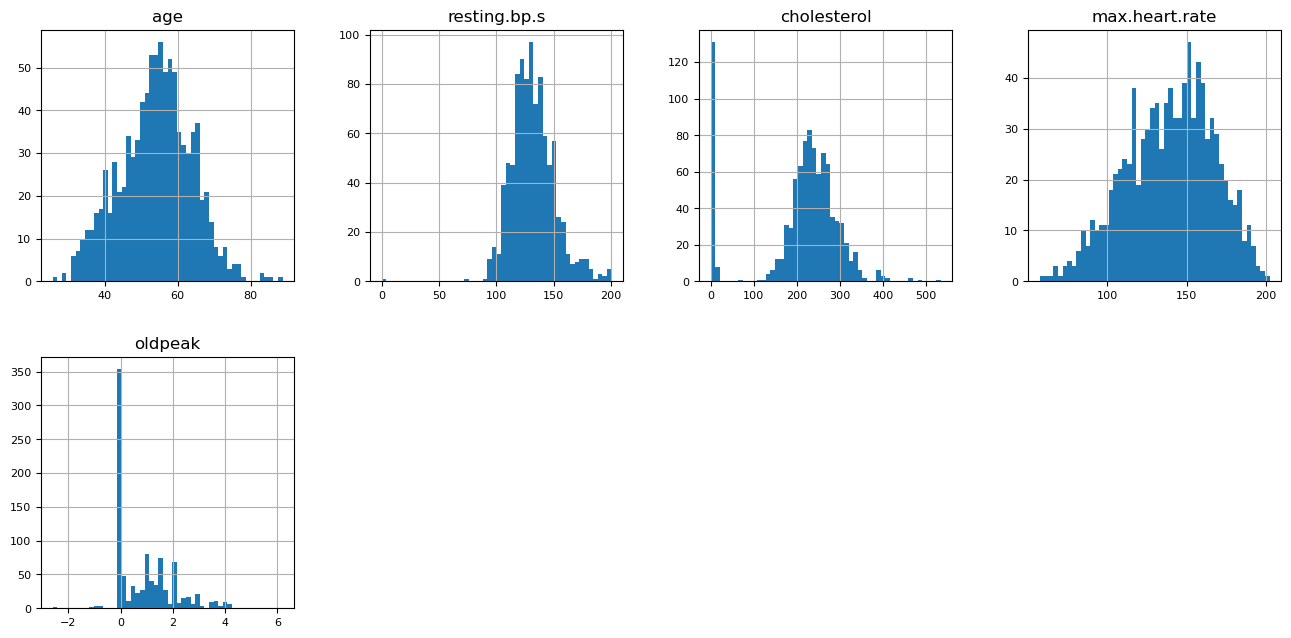

In [8]:
# 檢查數值型特徵的分佈
train_data[numeric].hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8, layout=(4, 4))
plt.show()

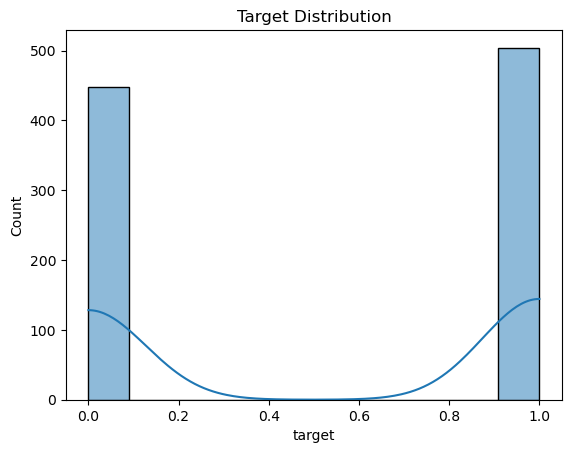

In [9]:
# 檢查目標變數的分佈
sns.histplot(train_data['target'], kde=True)
plt.title('Target Distribution')
plt.show()

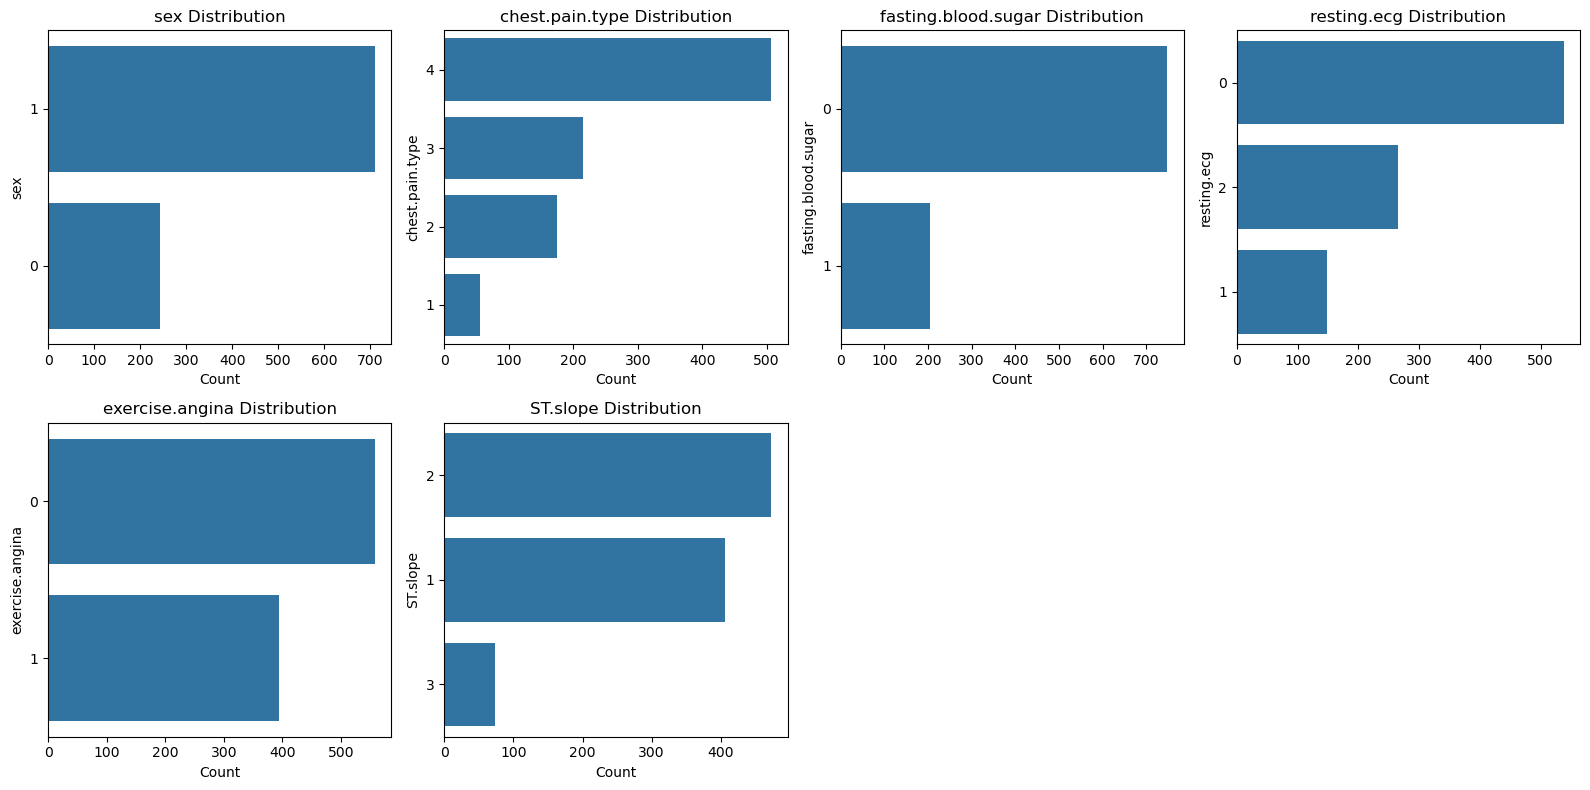

In [10]:
num_cat_features = len(categorical)
rows = math.ceil(num_cat_features / 4)
cols = min(4, num_cat_features)

fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(categorical):
    sns.countplot(y=train_data[feature], order=train_data[feature].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# 刪除空白的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

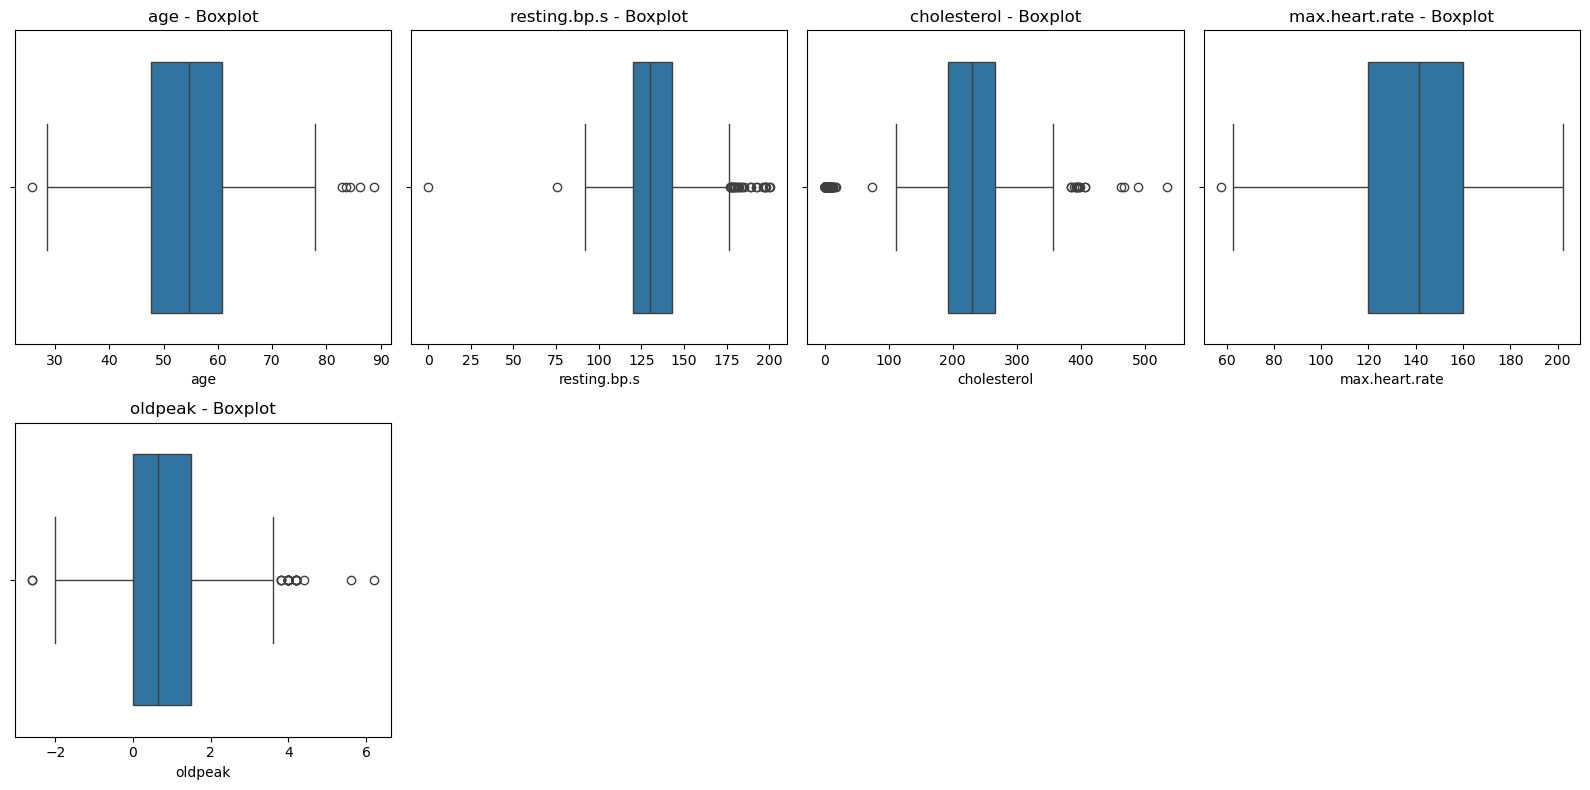

In [11]:
# 繪製箱線圖來檢查異常值
def plot_boxplots(df, numeric_features):
    num_features = len(numeric_features)
    rows = int(np.ceil(num_features / 4))
    cols = min(4, num_features)

    plt.figure(figsize=(cols * 4, rows * 4))
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x=df[feature])
        plt.title(f'{feature} - Boxplot')
    plt.tight_layout()
    plt.show()

plot_boxplots(train_data, numeric)